Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,model_selection

In [33]:
california = datasets.fetch_california_housing()
x = california["data"]
y = california["target"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.001)
# (20640,) (20640,8) 

n = X_train.shape[0]
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)



In [19]:
X_train.shape

(20433, 8)

In [4]:
def gradientDescent(y_exp, y_pred,x, n):
    error = y_exp-y_pred
    slope_gradient = (-1/2*n)* np.dot(x.T, error)
    intercept_gradient =  (-1/2*n)*np.sum(error)
    return slope_gradient, intercept_gradient    
    

In [5]:
def predict(x, slope, intercept):
    return np.dot(x, slope) + intercept


In [6]:
def train(x,y,slope,intercept,learningRate, iterations, n):
    for _ in range(iterations):
        y_pred = predict(x,slope,intercept)
        slope_gradient, intercept_gradient = gradientDescent(y,y_pred, x,n)

        slope -= slope_gradient*learningRate
        intercept -= intercept_gradient*learningRate
        print(slope, intercept)

    return slope, intercept
        # y_line = slope*x + intercept
        # plt.plot(y, y_line,color='k')

[ 9.66614268e-07  6.51594240e-06  1.24513361e-06  2.44272103e-07
  3.20077800e-04  6.71067210e-07  7.97247819e-06 -2.68538293e-05] [2.24544188e-07]
[ 1.55397632e-06  1.05186095e-05  1.97317298e-06  3.83726492e-07
  4.13475357e-04  9.85904526e-07  1.24787228e-05 -4.20312976e-05] [3.51306434e-07]
[ 2.02983604e-06  1.37816310e-05  2.54915075e-06  4.92357923e-07
  4.40421882e-04  1.19612636e-06  1.59658035e-05 -5.37757270e-05] [4.49319573e-07]
[ 2.47268513e-06  1.68249530e-05  3.08007738e-06  5.91858195e-07
  4.47888793e-04  1.37549409e-06  1.91510864e-05 -6.45036729e-05] [5.38820793e-07]
[ 2.90553399e-06  1.98010022e-05  3.59732381e-06  6.88586422e-07
  4.49645825e-04  1.54563121e-06  2.22448725e-05 -7.49235660e-05] [6.2574277e-07]
[ 3.33512859e-06  2.27544669e-05  4.11008713e-06  7.84406917e-07
  4.49729595e-04  1.71287696e-06  2.53088162e-05 -8.52430974e-05] [7.11824794e-07]
[ 3.76344698e-06  2.56984513e-05  4.62106412e-06  8.79866339e-07
  4.49323443e-04  1.87908994e-06  2.83609955e-05

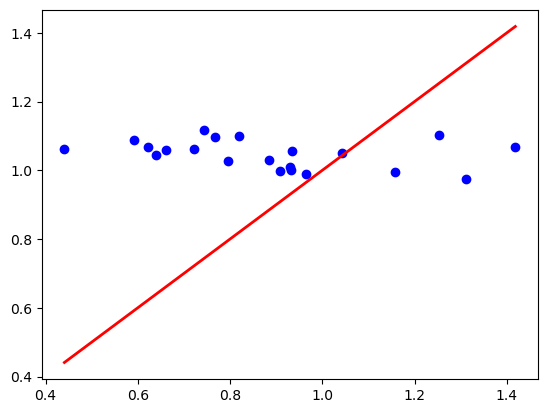

In [52]:
slope = np.zeros(X_train.shape[1])
intercept = np.zeros(1)
learningRate = 0.000000000000001
iterations = 20000
slope, intercept = train(X_train, y_train,slope,intercept, learningRate, iterations, n)
y_pred = predict(X_test,slope,intercept)

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red', linewidth='2')
plt.show()



 

In [53]:
mse = np.mean((y_test - y_pred)**2)
sstot = np.mean((y_test - np.mean(y_test))**2)
r2 = 1-(mse/sstot)
print("MSE:", mse, r2)

MSE: 0.0948635675345939 -0.5909711084579743
